<div>
<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 3: Practical - Logistic Regression <br> <br>
<font color=686880 size=4>
    TAs: Ali Salesi - Alireza Dehghanpour - Arman Malekzadeh
    
____

### Full Name : Mohammad Abolnejadian
### Student Number : 98103867
### Colab Link: https://colab.research.google.com/drive/1GcZYY-3pmxwPr-yB1BViwT4f285lJgxX?usp=sharing
___

## 1. Introduction (10 points)
The datasets consist of several medical predictor(independent) variables and one target (dependent) variable, "Outcome". Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
  * Pregnancies
  * Glucose
  * BloodPressure
  * SkinThickness
  * Insulin
  * BMI
  * DiabetesPedigreeFunction
  * Age


First, we perform some data exploration to get a better understanding of the data. Then, we perform some data preprocessing to prepare the data for the regression model. Finally, we train a regression model to predict the outcome.

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [33]:
!wget https://github.com/sharif-ml/sharif-ml.github.io/raw/main/assignments/diabet-train.csv

694.36s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
--2023-05-05 19:38:20--  https://github.com/sharif-ml/sharif-ml.github.io/raw/main/assignments/diabet-train.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sharif-ml/sharif-ml.github.io/main/assignments/diabet-train.csv [following]
--2023-05-05 19:38:23--  https://raw.githubusercontent.com/sharif-ml/sharif-ml.github.io/main/assignments/diabet-train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20859 (20K) [text/plain]
Saving to: ‘diabet-train.csv.1’

diabet-train.csv.1  100%[==================

TODO: Load the dataset as a dataframe. Then, check for any null values. Remove the rows containing them. Finally, display the first 10 rows.

In [121]:
df = pd.read_csv('diabet-train.csv')
df = df.dropna(how='any',axis=0) 
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


TODO: Calculate the mean, standard deviation, min and max value for each column.

In [122]:
df.describe().loc[['mean', 'std', 'min', 'max']]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,3.818314,120.399709,68.816860,20.437500,79.325581,31.862500,0.475683,33.138081,0.343023
std,3.359206,32.335016,19.412061,15.998604,115.199903,7.945238,0.338147,11.828338,0.475065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. Data Exploration (10 points)
In this section, we perform some data exploration to get a better understanding of the data.
First, we draw heatmaps to see the correlation between the features.
Then we draw pairplots to see the distribution of the features.

TODO: Draw a heatmap based on the correlation between the features (hint: you can use `seaborn`)

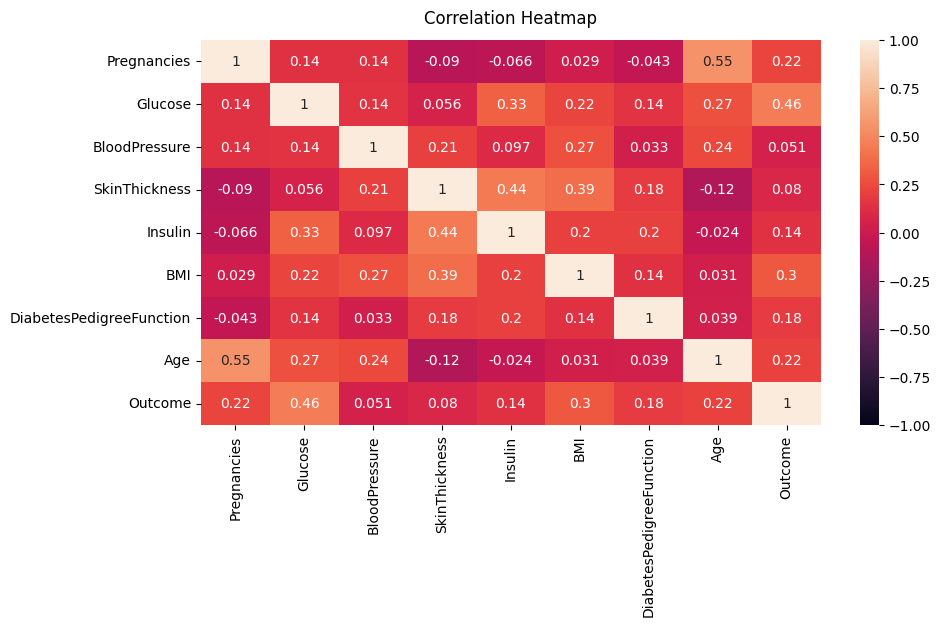

In [123]:
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

TODO: Draw the pairplot associated with the dataframe using `seaborn`.

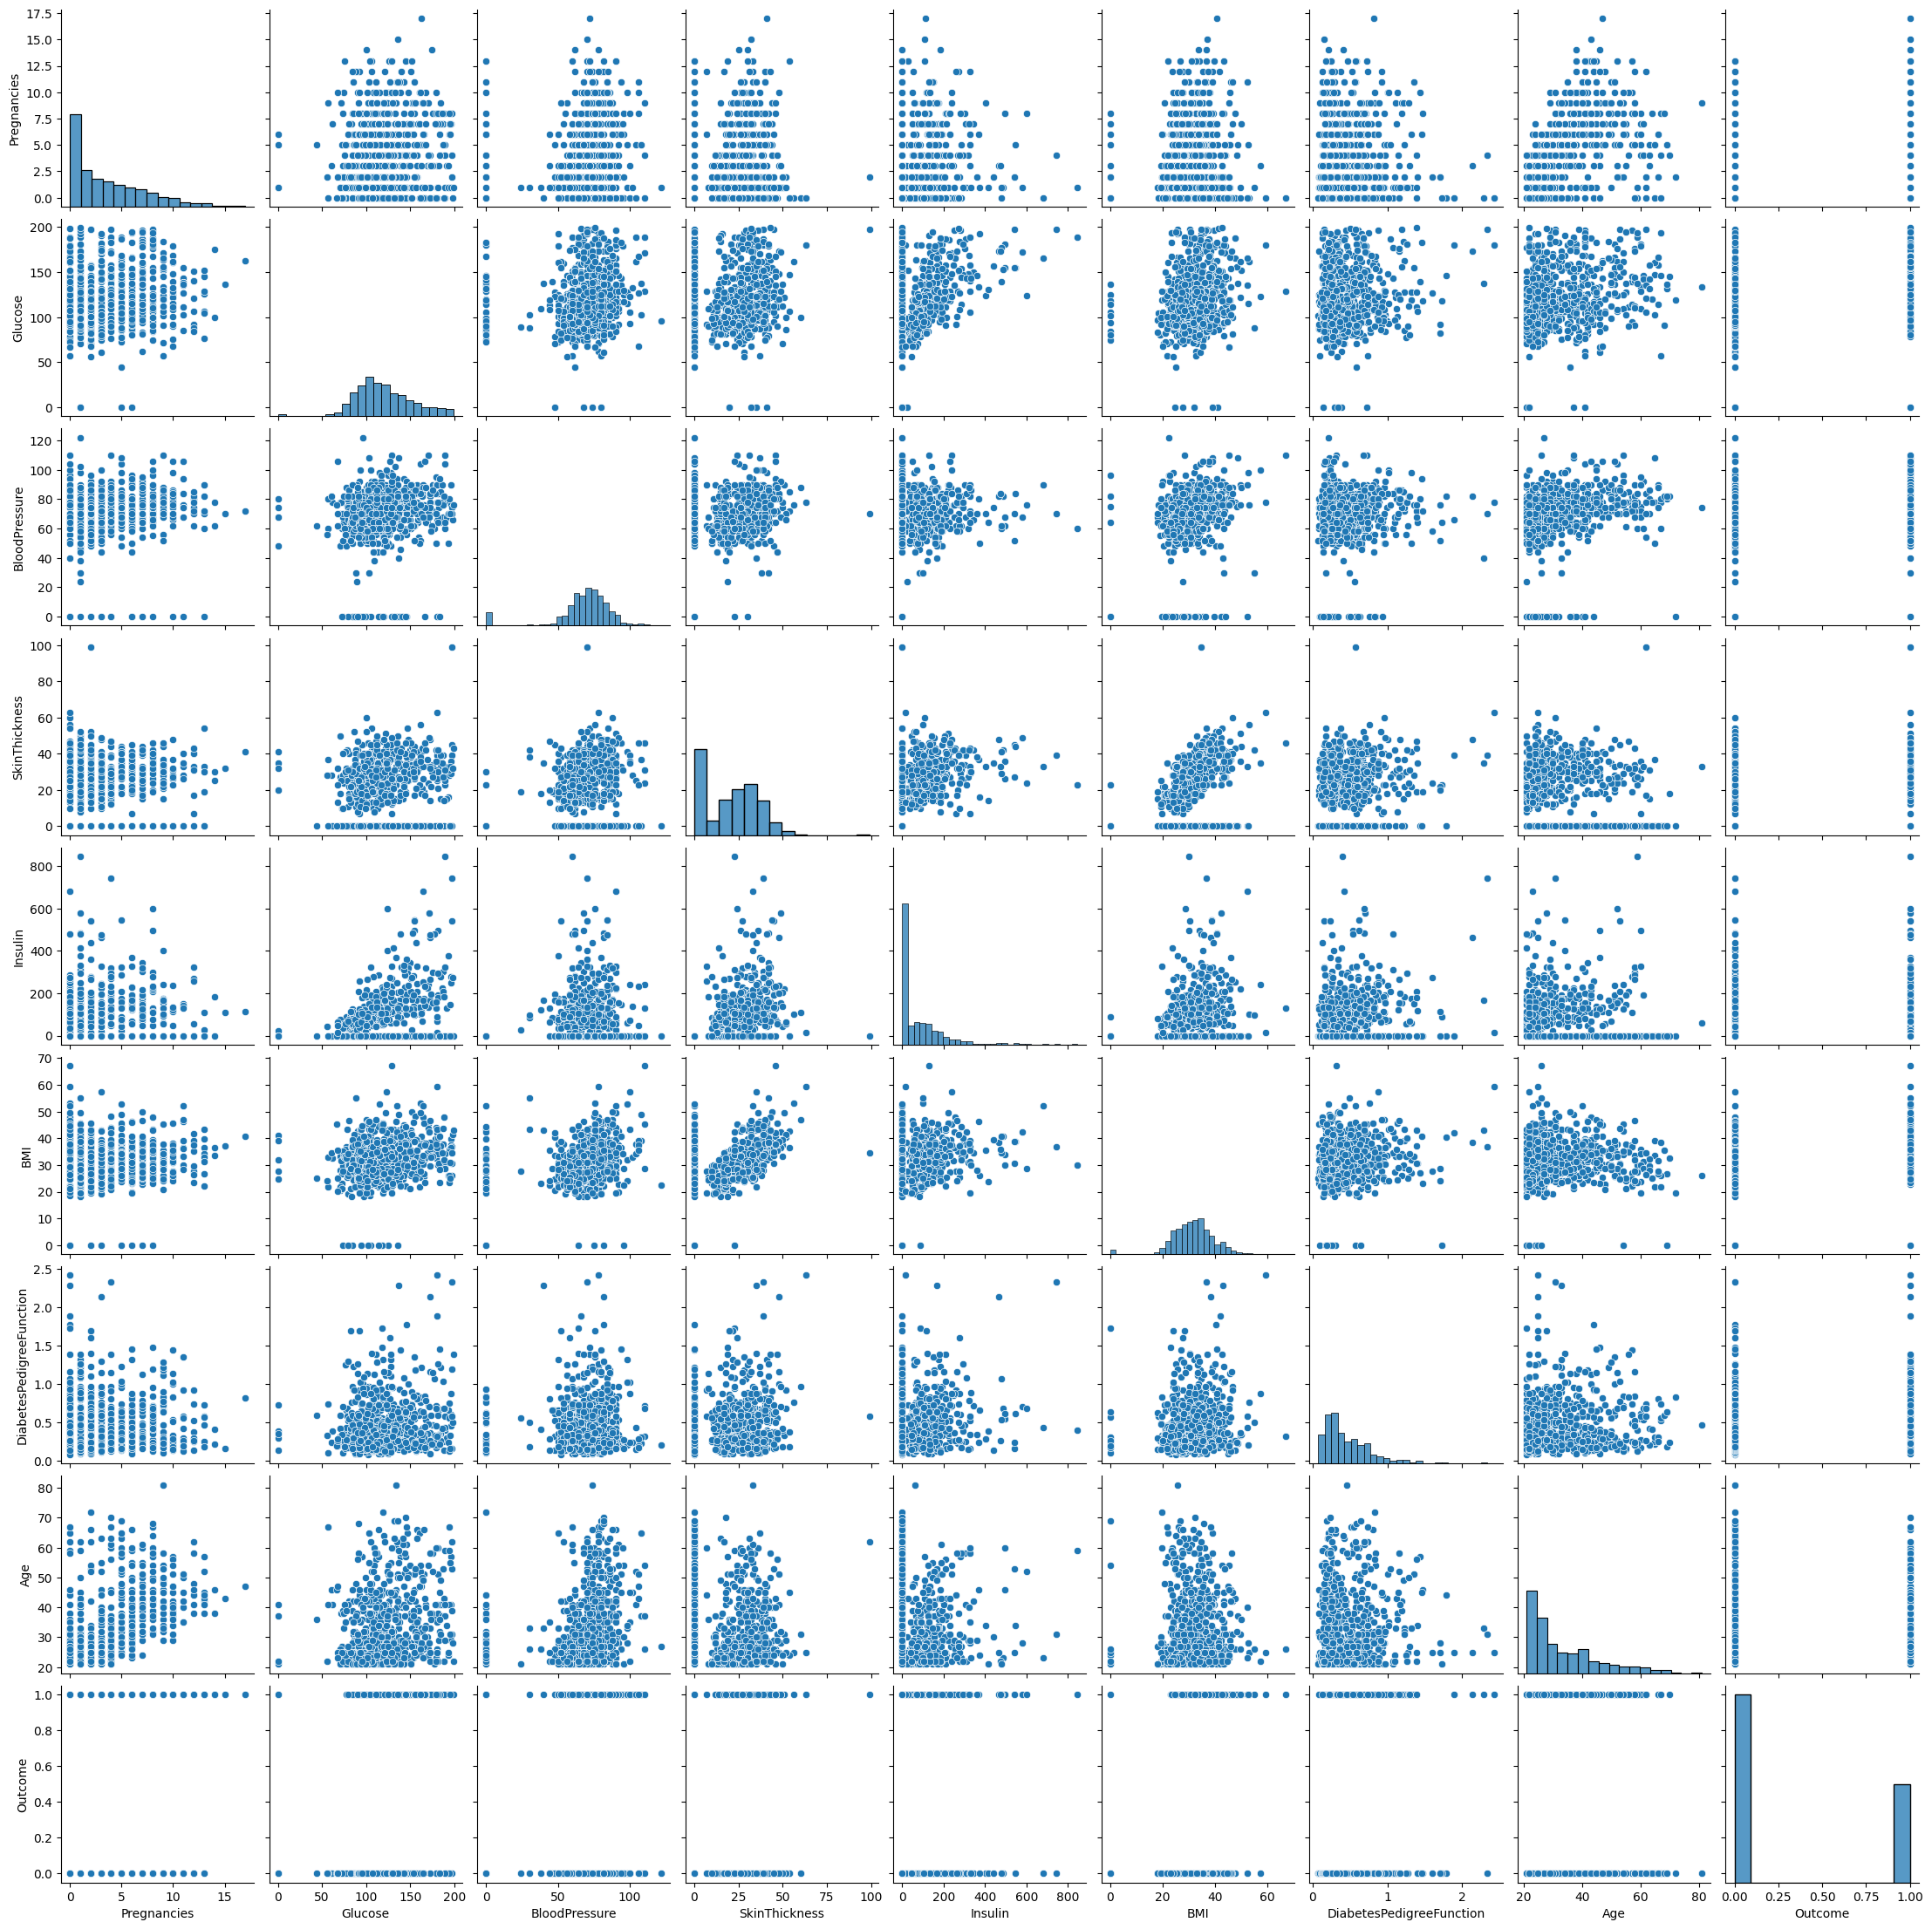

In [124]:
g = sns.pairplot(df)
plt.show()

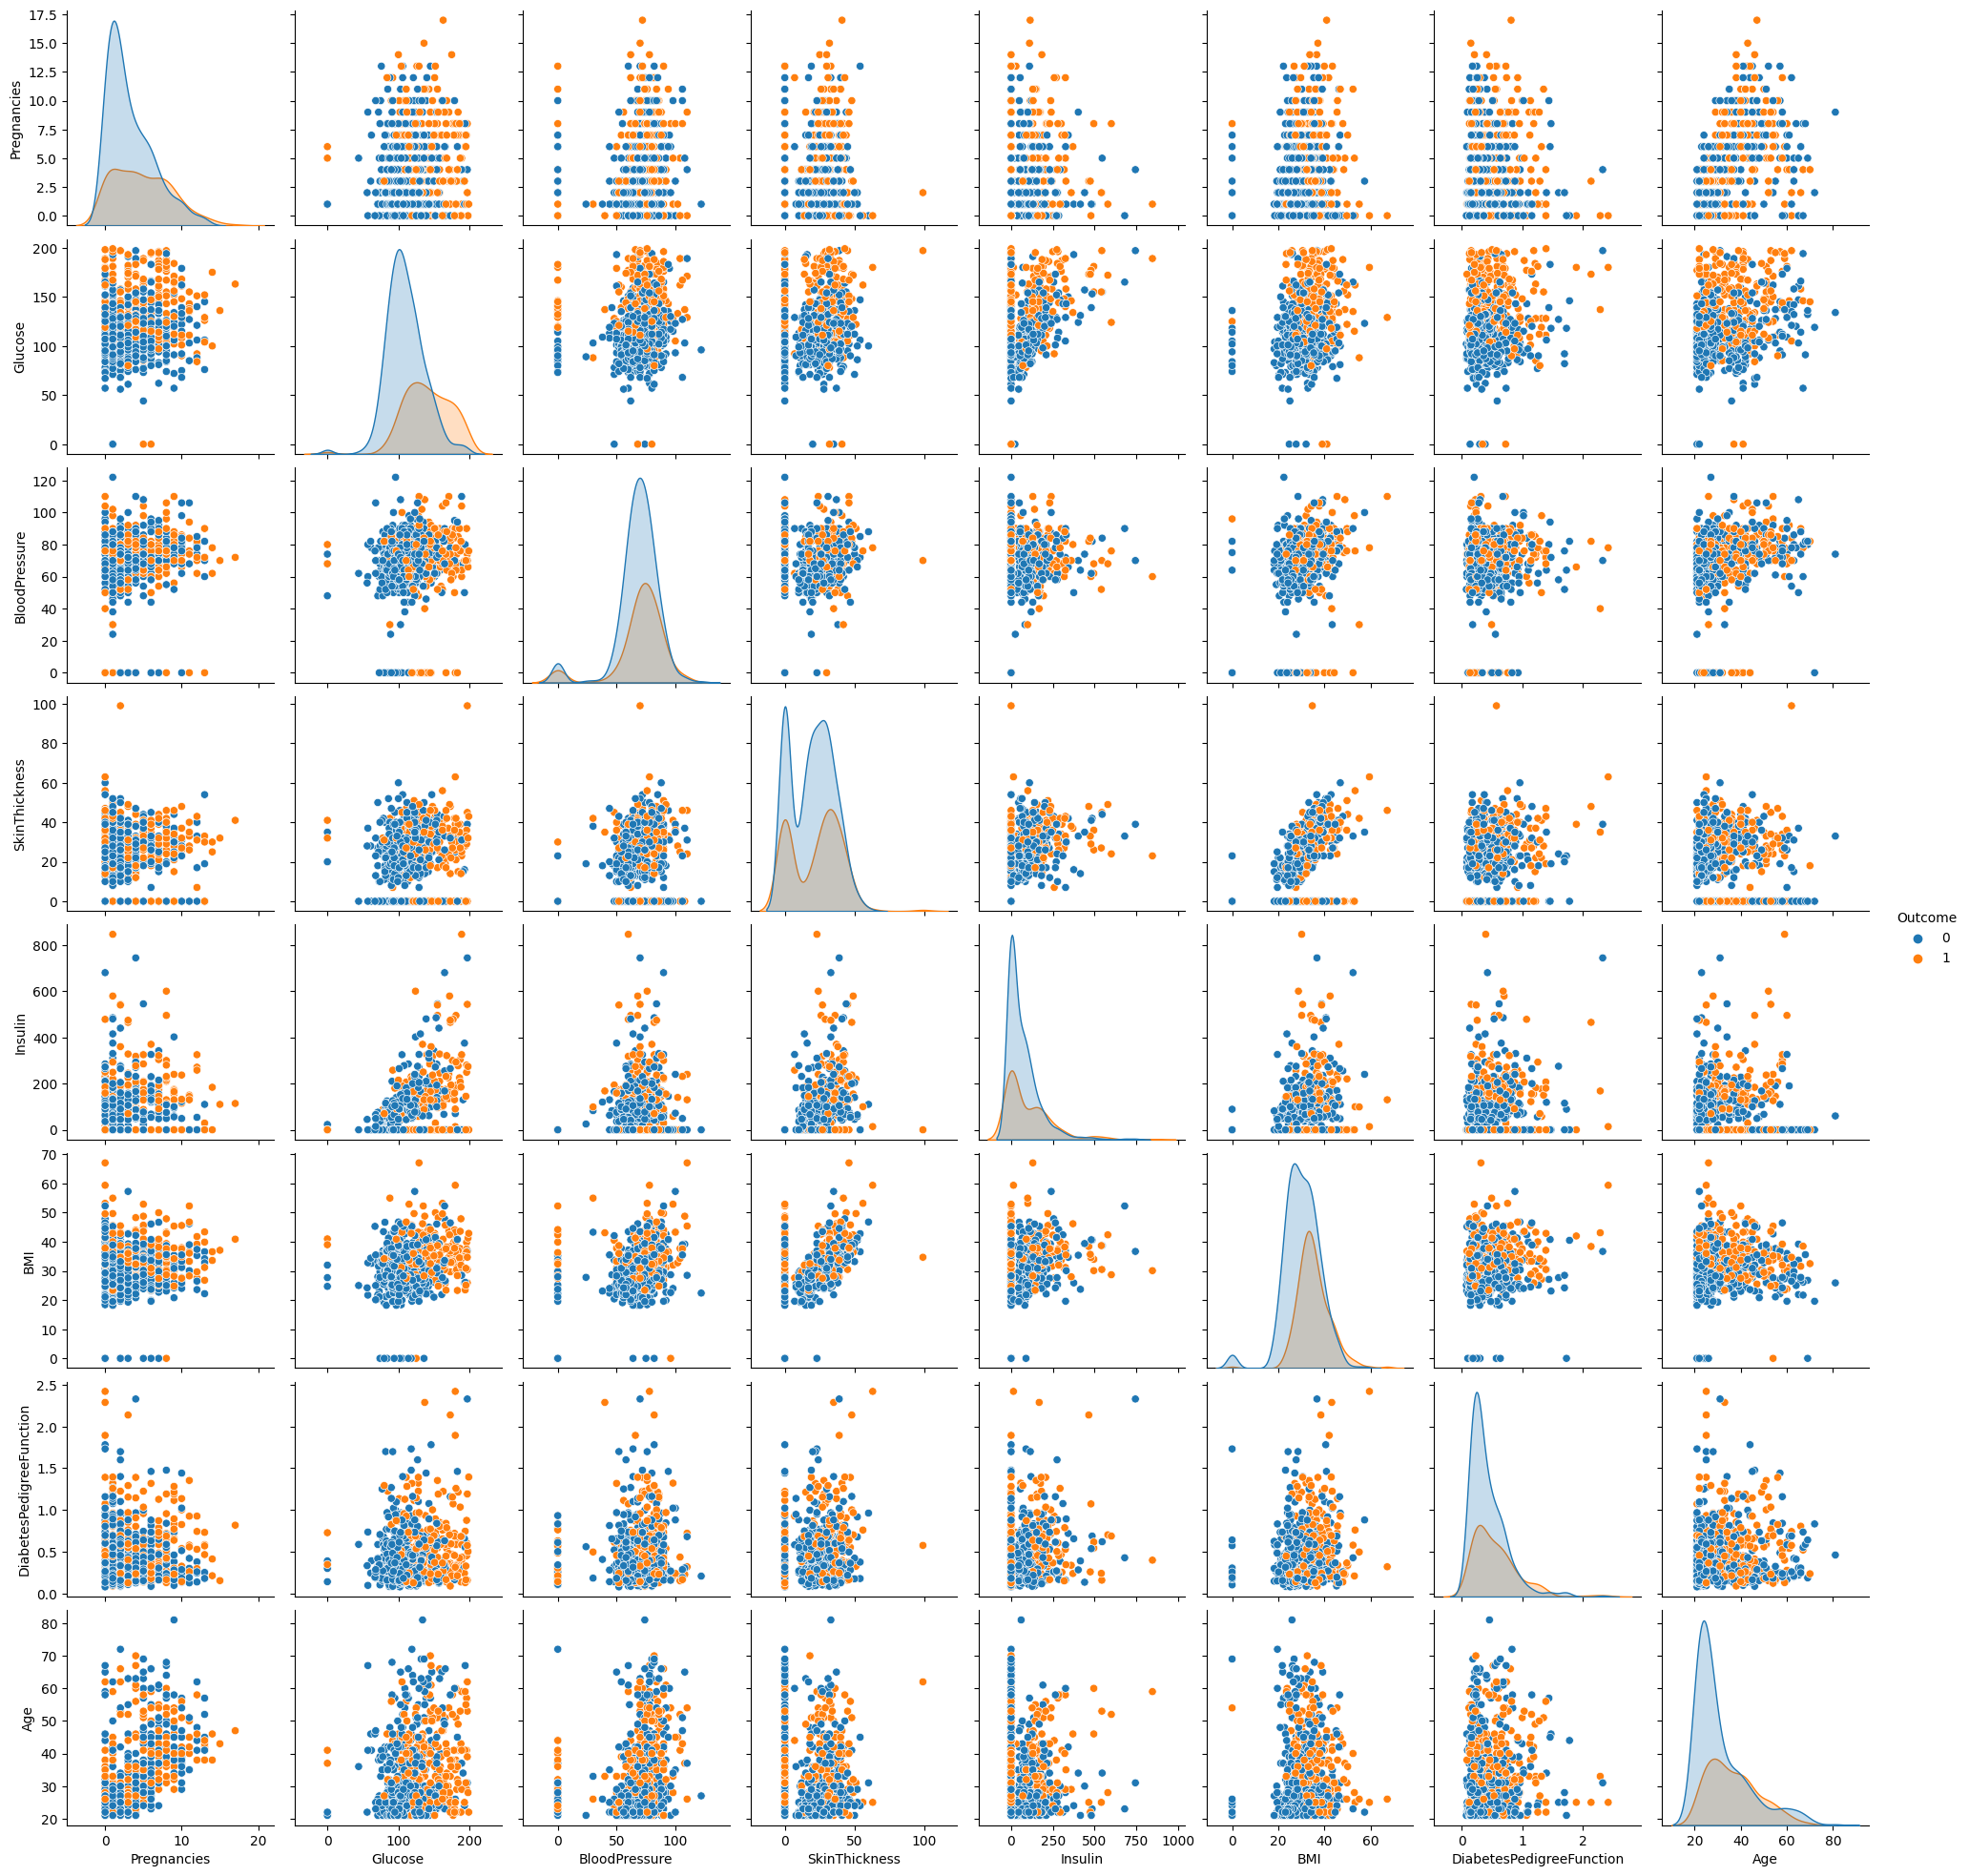

In [125]:
sns.pairplot(df, hue='Outcome')

## 3. SKLearn Regression Model (15 points)

### 3.1 Logistic Regression
In this section, we perform logistic regression to predict the outcome.
Then we draw confusion matrix to see the accuracy of the model.

TODO: Train a logistic regression model using `sklearn`. Use 20% of the data for the testing phase, and the remaining for the training phase.

In [126]:
features_df = df.drop(columns = ['Outcome'])
outcome_df = df.loc[:, ['Outcome']]
x = features_df.to_numpy()
y = outcome_df.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x,y , train_size=0.8)
clf = LogisticRegression(max_iter=500).fit(x_train, np.ravel(y_train))
a = clf.predict(x_test)
acc = (1 - np.sum(np.absolute(a - np.ravel(y_test)))/y_test.shape[0])*100
print("Accuracy of sklearn model: " + str(acc))
clf

Accuracy of sklearn model: 73.18840579710144


LogisticRegression(max_iter=500)

## 4. Custom Regression Model (30 points)
First, we define base model for regression model.

### 4.1 Gradient Descent Logistic Regression Model

In [127]:
## DO NOT CHANGE THE CONTENTS OF THIS CELL

from abc import ABC, abstractmethod


class BaseModel(ABC):
    def __init__(self, n_features):
        self.N = n_features
        self.beta = np.zeros((self.N+1,))

    @abstractmethod
    def fit(self, X_train, y_train):
        raise NotImplementedError('must override fit')

    @abstractmethod
    def predict(self, X_test):
        raise NotImplementedError('must override predict')

In [128]:
class GDModel(BaseModel):
    def __init__(self, n_features, max_iter=50000, lr=0.0009, tol=1e-6, momentum=0.9):
        super().__init__(n_features)
        self.max_iter = max_iter
        self.lr = lr
        self.tol = tol
        self.momentum = momentum
        self.losses = []

    @abstractmethod
    def loss(self, X, y):
        raise NotImplementedError("must override loss")

    @abstractmethod
    def loss_derivative(self, X, y):
        raise NotImplementedError("must override loss derivative")

    def fit(self, X_train, y_train):
        X_train_new = np.concatenate(
            (X_train, np.ones((X_train.shape[0], 1))), axis=1)
        last_loss = 0
        momentum = 0
        for i in range(self.max_iter):
            loss = self.loss(X_train_new, y_train)
            if abs(loss - last_loss) < self.tol:
              dif = abs(loss - last_loss)
              break
            last_loss = loss
            dl = self.loss_derivative(X_train_new, y_train) + self.momentum * momentum
            momentum = dl
            self.beta = self.beta - self.lr * dl
            self.losses.append(loss)

TODO: Imeplement the Logistic Regression model. For this class, the only things you have to change are the definitions of the following functions: `loss`, `loss_derivative`, and `predict`. 
<br>
Note: Some basic explanations about the concept of "gradient descent" will be given to you in a TA session very soon. However, completing this task doesn't necessarily depend on being familiar with that concept.

In [129]:
class GDLogisticRegression(GDModel):
    def __init__(self, n_features, **kwargs):
        super().__init__(n_features, **kwargs)
        # self.beta = np.zeros((self.N+1,))
        self.beta = np.reshape(np.random.normal(0, 1/np.sqrt(self.N), (self.N+1)), (self.N+1,))

    def sigmoid(self, x):
      return 1/(1 + np.exp(-x))
    
    def calculate_y_predicted(self, x):
      Z = np.dot(x, self.beta)
      y_predicted = self.sigmoid(Z)
      return y_predicted

    def loss(self, X, y):
      n = X.shape[0]
      predicted_y = self.calculate_y_predicted(X)
      prob_tmp1 = np.where(predicted_y > 1.0e-10, predicted_y, 1.0e-10)
      result1 = np.where(predicted_y > 1.0e-10, np.log(prob_tmp1), -10)
      prob_tmp2 = np.where((1-predicted_y) > 1.0e-10, 1-predicted_y, 1.0e-10)
      result2 = np.where((1-predicted_y) > 1.0e-10, np.log(prob_tmp2), -10)
      lossnew = (-1/n) * np.sum(result1*y + result2*(1-y))
      loss = (-1/n) * np.sum(np.where(predicted_y > 0.0000000000001, np.log(predicted_y), -10)*y + np.where((1-predicted_y) > 0.0000000000001, np.log((1-predicted_y)), -10)*(1-y))
      # loss = (-1/n) * np.sum(np.log(predicted_y) * y + np.log(1-predicted_y) * (1-y))
      return lossnew

    def loss_derivative(self, X, y):
      n = X.shape[0]
      return (1/n) * (np.dot(X.T, (self.calculate_y_predicted(X) - y)))

    def predict(self, X):
      y_predicted = self.calculate_y_predicted(X)
      y_predicted_cls = [1 if i >= 0.5 else 0 for i in y_predicted]
      return np.array(y_predicted_cls)

TODO: Implement the Logistic Regression Model. This time, use Pytorch!

In [130]:
# DO NOT CHANGE THE CONTENT OF THIS CELL

import torch

class GDTorchModel(BaseModel):
    def __init__(self, n_features, max_iter=50000, init_lr=0.0001):
        super().__init__(n_features)
        self.max_iter = max_iter
        self.init_lr = init_lr
        self.optimizer = None
        self.scheduler = None

    @abstractmethod
    def loss(self, X, y):
        raise NotImplementedError("must override loss")

    def fit(self, X_train, Y_train):
      X_train_new = torch.cat([X_train, torch.ones((X_train.shape[0], 1))], dim=1)
      for _ in range(self.max_iter):
          loss = self.loss(X_train_new, Y_train)
          loss.backward()
          self.optimizer.step()
          self.optimizer.zero_grad()
          self.scheduler.step(loss)

Note: Just change the definitions of `loss` and `predict`.

In [131]:
class GDTorchLogisticRegression(GDTorchModel):
    def __init__(self, n_features, **kwargs):
        super().__init__(n_features, **kwargs)
        self.beta = torch.randn(self.N+1, requires_grad=True)
        self.optimizer = torch.optim.Adam([self.beta], lr=0.01)
        self.scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(self.optimizer, 'min', patience=1000, factor=0.5)

    def linear_formula(self, X):
      Z = torch.matmul(X, self.beta)
      return Z
      
    def predict_y(self, X):
      sig = torch.nn.Sigmoid()
      res = sig(self.linear_formula(X))
      return res
  
    def loss(self, X, y):
        y_predicted = self.predict_y(X)
        ls = torch.nn.BCELoss()
        return ls(y_predicted, y)

    def predict(self, X):
        y_predicted = self.predict_y(X)
        y_predicted_cls = [1 if i >= 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls) 

TODO: Predict the "Outcome" for the testing samples using all of the models (the one you trained using `sklearn` and the other ones for which you used your own code).

In [134]:
x_train, x_test, y_train, y_test = train_test_split(x,y , train_size=0.8)
X_test_new = np.concatenate(
            (x_test, np.ones((x_test.shape[0], 1))), axis=1)

## Train initial custom model
initial_lr = GDLogisticRegression(x_train.shape[1])
initial_lr.fit(x_train, np.ravel(y_train))

initial_lr_predicted = initial_lr.predict(X_test_new)

acc = (1 - np.sum(np.absolute(initial_lr_predicted - np.ravel(y_test)))/y_test.shape[0])*100
print("Accuracy of initial model: " + str(acc))

/var/folders/26/r6cl1fqx2zz6066l4b3zd3_80000gn/T/ipykernel_21496/2251375425.py:23: RuntimeWarning: divide by zero encountered in log
  loss = (-1/n) * np.sum(np.where(predicted_y > 0.0000000000001, np.log(predicted_y), -10)*y + np.where((1-predicted_y) > 0.0000000000001, np.log((1-predicted_y)), -10)*(1-y))


Accuracy of initial model: 71.73913043478262


In [135]:
## Train initial custom model with pytorch
torch_lr = GDTorchLogisticRegression(x_train.shape[1])
torch_lr.fit(torch.from_numpy(x_train.astype(np.float32)), torch.from_numpy(np.ravel(y_train).astype(np.float32)))

torch_lr_predicted =  torch_lr.predict(torch.from_numpy(X_test_new.astype(np.float32)))

acc = (1 - np.sum(np.absolute(torch_lr_predicted - np.ravel(y_test)))/y_test.shape[0])*100
print("Accuracy of initial model with pytorch: " + str(acc))

Accuracy of initial model with pytorch: 79.71014492753623


In [136]:
## Train model with sklearn
clf = LogisticRegression(max_iter=500)
clf.fit(x_train, np.ravel(y_train))

sklearn_lr_predicted = clf.predict(x_test)

acc = (1 - np.sum(np.absolute(sklearn_lr_predicted - np.ravel(y_test)))/y_test.shape[0])*100
print("Accuracy of sklearn model: " + str(acc))

Accuracy of sklearn model: 81.88405797101449


# Evaluation (20 points)

TODO: Calculate `precision`, `recall`, and `f1-score`, and the `confusion_matrix` using your own code. Do this for the predictions given by both of the models.

In [144]:
class classification_full_report():

    def __init__(self, y_true, y_pred):
        '''
        Parameters:
            y_true : 1d array-like, or label indicator array
                    Ground truth (correct) target values.
            y_pred : 1d array-like, or label indicator array
                    Estimated targets as returned by a classifier.

        '''
        self.y_true = y_true
        self.y_pred = y_pred
      
    def compute_tp_tn_fn_fp(self):
      '''
      True positive - actual = 1, predicted = 1
      False positive - actual = 1, predicted = 0
      False negative - actual = 0, predicted = 1
      True negative - actual = 0, predicted = 0
      '''
      tp = sum((self.y_true == 1) & (self.y_pred == 1))
      tn = sum((self.y_true == 0) & (self.y_pred == 0))
      fn = sum((self.y_true == 1) & (self.y_pred == 0))
      fp = sum((self.y_true == 0) & (self.y_pred == 1))
      return tp, tn, fp, fn
    
    def accuracy(self):
      tp, tn, fp, fn = self.compute_tp_tn_fn_fp()
      return ((tp + tn) * 100)/ float(tp + tn + fn + fp)
    

    def f1_score(self):
        '''
        Returns:
            f1: the f1-score calculated based on "y_true" and "y_pred". 
        Note: You should first calculate this value for each class, and then
             use the secondary values for calculating the "macro" average.
        '''
        precision = self.precision()
        recall = self.recall()
        f1_score = (2*precision*recall)/ (precision + recall)
        return f1_score

    def precision(self):
        '''
        Returns:
            precision: the precision calculated based on "y_true" and "y_pred". 
        Note: You should first calculate this value for each class, and then
             use the secondary values for calculating the "macro" average.
        '''
        tp, tn, fp, fn = self.compute_tp_tn_fn_fp()
        return (tp)/ float( tp + fp)

    def recall(self):
        '''
        Returns:
            precision: the precision calculated based on "y_true" and "y_pred". 
        Note: You should first calculate this value for each class, and then
             use the secondary values for calculating the "macro" average.
        '''
        tp, tn, fp, fn = self.compute_tp_tn_fn_fp()
        return (tp)/ float(tp + fn)

    def confusion_matrix(self):
        '''
        Returns:
            precision: the confusion matrix calculated based on "y_true" and "y_pred". 
        Note: You should first calculate this value for each class, and then
             use the secondary values for calculating the "macro" average.
        '''
        tp, tn, fp, fn = self.compute_tp_tn_fn_fp()
        return np.array([[tp, fp],
                        [fn, tn]])

In [145]:
report_initial = classification_full_report(np.ravel(y_test), initial_lr_predicted)
# print(rep.accuracy(), rep.f1_score(), rep.precision(), rep.recall())
print("Accuracy of initial model: " + str(report_initial.accuracy()))
print("f1 score of initial model: " + str(report_initial.f1_score()))
print("precision of initial model: " + str(report_initial.precision()))
print("recall of initial model: " + str(report_initial.recall()))
print("confusion matrix of initial model: " + str(report_initial.confusion_matrix()))

Accuracy of initial model: 71.73913043478261
f1 score of initial model: 0.6776859504132231
precision of initial model: 0.5324675324675324
recall of initial model: 0.9318181818181818
confusion matrix of initial model: [[41 36]
 [ 3 58]]


In [146]:
report_torch = classification_full_report(np.ravel(y_test), torch_lr_predicted)
# print(rep.accuracy(), rep.f1_score(), rep.precision(), rep.recall())
print("Accuracy of initial model with pytorch: " + str(report_torch.accuracy()))
print("f1 score of initial model with pytorch: " + str(report_torch.f1_score()))
print("precision of initial model with pytorch: " + str(report_torch.precision()))
print("recall of initial model with pytorch: " + str(report_torch.recall()))
print("confusion matrix of initial model with pytorch: " + str(report_torch.confusion_matrix()))

Accuracy of initial model with pytorch: 79.71014492753623
f1 score of initial model with pytorch: 0.65
precision of initial model with pytorch: 0.7222222222222222
recall of initial model with pytorch: 0.5909090909090909
confusion matrix of initial model with pytorch: [[26 10]
 [18 84]]


In [148]:
report_sklearn = classification_full_report(np.ravel(y_test), sklearn_lr_predicted)
# print(rep.accuracy(), rep.f1_score(), rep.precision(), rep.recall())
print("Accuracy of sklearn model: " + str(report_sklearn.accuracy()))
print("f1 score of sklearn model: " + str(report_sklearn.f1_score()))
print("precision of sklearn model: " + str(report_sklearn.precision()))
print("recall of sklearn model: " + str(report_sklearn.recall()))
print("confusion matrix of sklearn model: " + str(report_sklearn.confusion_matrix()))

Accuracy of sklearn model: 81.8840579710145
f1 score of sklearn model: 0.691358024691358
precision of sklearn model: 0.7567567567567568
recall of sklearn model: 0.6363636363636364
confusion matrix of sklearn model: [[28  9]
 [16 85]]


# Finding the right Threshold (15 points)

TODO: Plot the "Precision-Recall Curve".

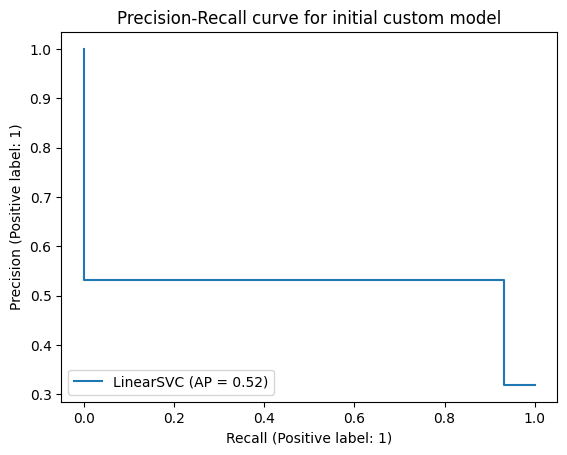

In [149]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_predictions(np.ravel(y_test), initial_lr_predicted, name="LinearSVC")
_ = display.ax_.set_title("Precision-Recall curve for initial custom model")

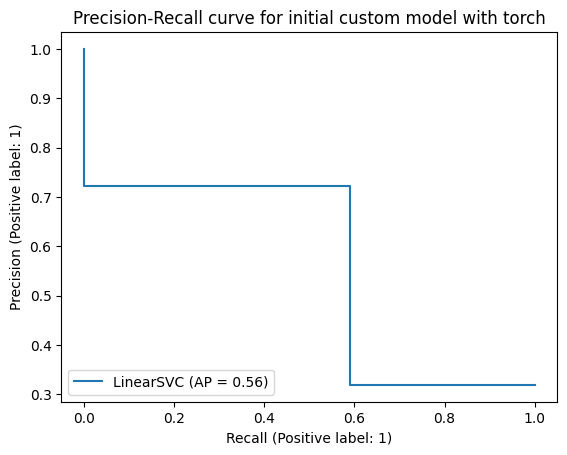

In [150]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_predictions(np.ravel(y_test), torch_lr_predicted, name="LinearSVC")
_ = display.ax_.set_title("Precision-Recall curve for initial custom model with torch")

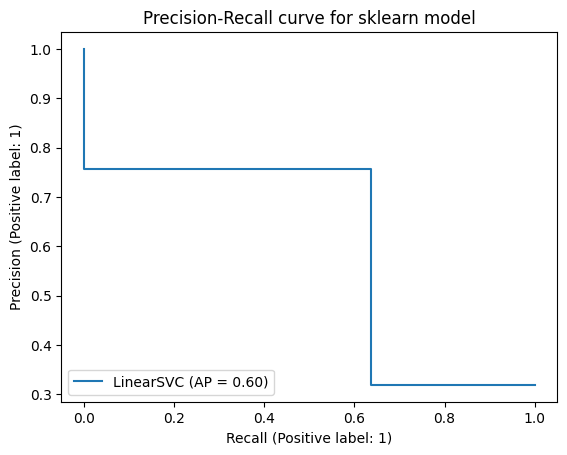

In [151]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_predictions(np.ravel(y_test), sklearn_lr_predicted, name="LinearSVC")
_ = display.ax_.set_title("Precision-Recall curve for sklearn model")

TODO: Based on the above curve, calculate the threshold minimizing the absolute difference between precision and recall.

In [152]:
precision, recall, thresholds = precision_recall_curve(np.ravel(y_test), initial_lr_predicted)
threshold = thresholds[np.argmin(np.abs(precision - recall))]
print("Treshold for initial custom model: " + str(threshold))

Treshold for initial custom model: 1


In [153]:
precision, recall, thresholds = precision_recall_curve(np.ravel(y_test), torch_lr_predicted)
threshold = thresholds[np.argmin(np.abs(precision - recall))]
print("Treshold for initial custom model with torch: " + str(threshold))

Treshold for initial custom model with torch: 1


In [154]:
precision, recall, thresholds = precision_recall_curve(np.ravel(y_test), sklearn_lr_predicted)
threshold = thresholds[np.argmin(np.abs(precision - recall))]
print("Treshold for sklearn model: " + str(threshold))

Treshold for sklearn model: 1


# Kaggle Competition

Link: https://www.kaggle.com/t/1013891ffec9479dadd5023e56c04f30